In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import glob
from windrose import WindroseAxes


c:\Users\chari\miniconda3\envs\mude\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data processing

## Loading and visualising data

In [2]:
IWV = xr.open_mfdataset('IWV/*.nc')
LWP = xr.open_mfdataset('LWP/*.nc')
MET = xr.open_mfdataset('MET/*.nc')
TPC = xr.open_mfdataset('TPC/*.nc')
HPC = xr.open_mfdataset('HPC/*.nc')
SPC = xr.open_mfdataset('SPC/*.nc')
DAVIS = xr.open_mfdataset('DAVIS/*.nc')

c:\Users\chari\miniconda3\envs\mude\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
BLH_19 = xr.open_mfdataset('BLH/240619.BLH.nc')

In [4]:
files = glob.glob('BLH/*.NC')

# Define a function to sort the dataset by time
def preprocess(ds):
    return ds.sortby('time')

# Open multiple files and apply preprocessing
BLH = xr.open_mfdataset(files, preprocess=preprocess)

In [5]:
TPC

<xarray.Dataset>
Dimensions:           (time: 3782, altitude_layer: 93)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-2...
Dimensions without coordinates: altitude_layer
Data variables: (12/14)
    file_code         (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID            (time) int32 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor          (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    integration_time  (time) int32 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    retrieval         (time) int32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    RF                (time) int32 dask.array<chunksize=(97,), meta=np.ndarray>
    ...                ...
    azimuth           (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    right_ascension   (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    declination       (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    min_T             (time) float32 221.0 221.0 221.0 ... 225.7 225.7 225.7
    max_T             (time) float32 287.9 287.9 287.9 ... 287.9 287.9 287.9
    T_prof            (time, altitude_layer) float32 dask.array<chunksize=(97, 93), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [6]:
MET

<xarray.Dataset>
Dimensions:            (time: 264070)
Coordinates:
  * time               (time) datetime64[ns] 2024-06-17T22:00:19 ... 2024-06-...
Data variables: (12/23)
    file_code          (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID             (time) int32 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor           (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    IntSampCnt         (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    Min_P              (time) float32 1.014e+03 1.014e+03 ... 1.014e+03
    Max_P              (time) float32 1.014e+03 1.014e+03 ... 1.017e+03
    ...                 ...
    Min_WD             (time) float32 93.0 93.0 93.0 93.0 ... 0.0 0.0 0.0 0.0
    Max_WD             (time) float32 253.0 253.0 253.0 ... 357.0 357.0 357.0
    Surf_WD            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
    Min_RR             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maximum_Rain_Rate  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Surf_RR            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [7]:
IWV

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_IWV     (time) float32 16.43 16.43 16.43 16.43 ... 21.53 21.53 21.53
    Max_IWV     (time) float32 18.44 18.44 18.44 18.44 ... 24.46 24.46 24.46
    IWV         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [8]:
LWP

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_LWP     (time) float32 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    Max_LWP     (time) float32 7.088 7.088 7.088 7.088 ... 97.89 97.89 97.89
    LWP         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [9]:
HPC.time[-1]

<xarray.DataArray 'time' ()>
array('2024-06-21T07:38:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-06-21T07:38:15
Attributes:
    long_name:  sample time
    comment:    time is UTC

In [10]:
indexer_17 = (MET.time >= pd.Timestamp("2024-06-17")) & (MET.time < pd.Timestamp("2024-06-18"))
indexer_18 = (MET.time >= pd.Timestamp("2024-06-18")) & (MET.time < pd.Timestamp("2024-06-19"))
indexer_19 = (MET.time >= pd.Timestamp("2024-06-19")) & (MET.time < pd.Timestamp("2024-06-20"))
indexer_20 = (MET.time >= pd.Timestamp("2024-06-20")) & (MET.time < pd.Timestamp("2024-06-21"))

# Boundary Layer Measurements

Text(0.5, 0, 'Datetime [UTC]')

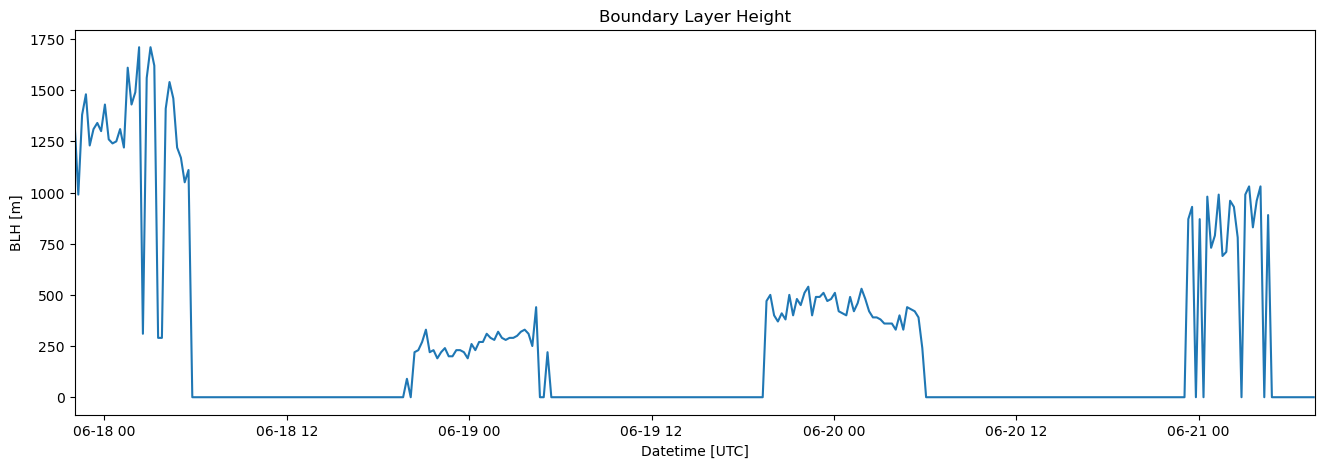

In [11]:
plt.figure(figsize=(16,5))
plt.plot(BLH.time,BLH.BLH)
plt.xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
plt.title('Boundary Layer Height')
plt.ylabel('BLH [m]')
plt.xlabel('Datetime [UTC]')


Text(0.5, 0, 'Datetime [UTC]')

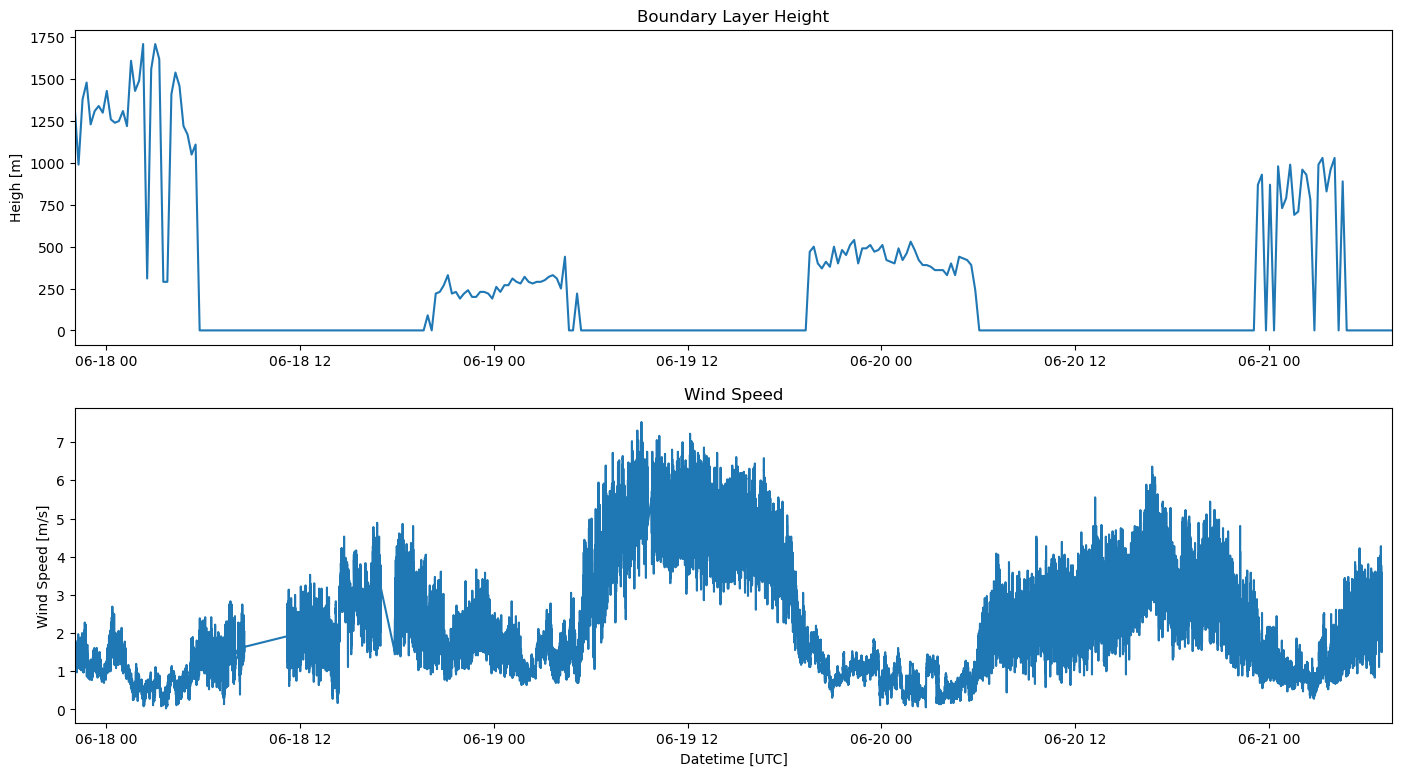

In [12]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,9))

ax1.plot(BLH.time, BLH.BLH)
ax1.set_title('Boundary Layer Height')
ax1.set_ylabel('Heigh [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
#ax1.set_xlabel('Datetime [UTC]')


MET_19= MET.sel(time = indexer_19)

ax2.plot(MET.time, MET.Surf_WS/3.6)
ax2.set_title('Wind Speed')
ax2.set_ylabel('Wind Speed [m/s]')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax2.set_xlabel('Datetime [UTC]')


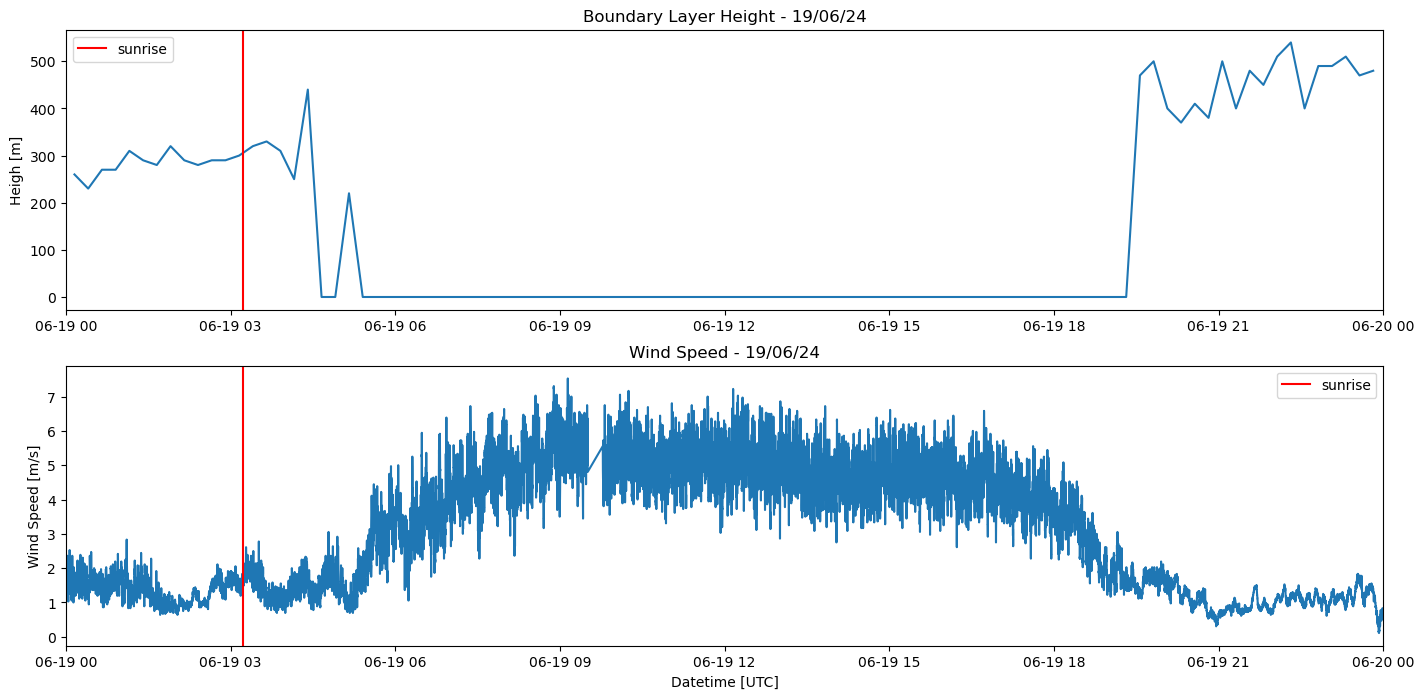

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.plot(BLH_19.time, BLH_19.BLH)
ax1.set_title('Boundary Layer Height - 19/06/24')
ax1.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red', label = 'sunrise')
ax1.set_ylabel('Heigh [m]')
ax1.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))
ax1.legend()

MET_19= MET.sel(time = indexer_19)

ax2.plot(MET_19.time, MET_19.Surf_WS/3.6)
ax2.set_title('Wind Speed - 19/06/24')
ax2.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red', label = 'sunrise')
ax2.set_ylabel('Wind Speed [m/s]')
ax2.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))
ax2.set_xlabel('Datetime [UTC]')
ax2.legend()


In [14]:
BLH

<xarray.Dataset>
Dimensions:     (time: 320)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:09 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    RF          (time) int32 dask.array<chunksize=(8,), meta=np.ndarray>
    Min_BLH     (time) float32 990.0 990.0 990.0 990.0 990.0 ... 0.0 0.0 0.0 0.0
    Max_BLH     (time) float32 1.48e+03 1.48e+03 1.48e+03 ... 1.03e+03 1.03e+03
    BLH         (time) float32 dask.array<chunksize=(8,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

### Temperature Profile

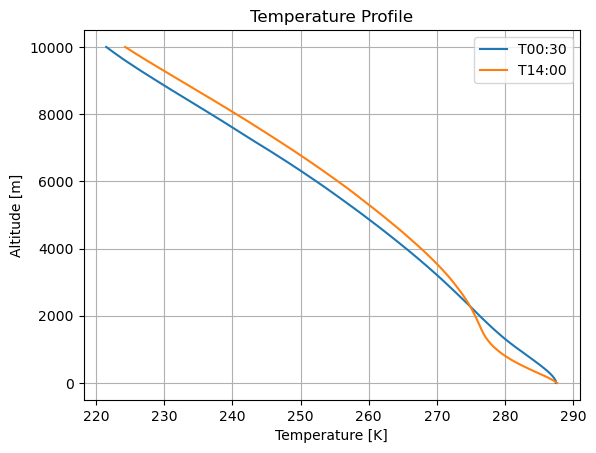

In [15]:
T1 = TPC.sel(time = pd.Timestamp("2024-06-17T22:32:08"), method = 'nearest')
T2 = TPC.sel(time = pd.Timestamp("2024-06-19T12"), method = 'nearest')

plt.plot(T1.T_prof, T1.altitude, label = 'T00:30')
plt.plot(T2.T_prof, T2.altitude, label = 'T14:00')
plt.legend()
plt.title('Temperature Profile')
#plt.ylim(0, 2500)
#plt.xlim(270, None)
plt.ylabel('Altitude [m]')
plt.xlabel('Temperature [K]')
plt.grid()

In [16]:
TPC

<xarray.Dataset>
Dimensions:           (time: 3782, altitude_layer: 93)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-2...
Dimensions without coordinates: altitude_layer
Data variables: (12/14)
    file_code         (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID            (time) int32 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor          (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    integration_time  (time) int32 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    retrieval         (time) int32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    RF                (time) int32 dask.array<chunksize=(97,), meta=np.ndarray>
    ...                ...
    azimuth           (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    right_ascension   (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    declination       (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    min_T             (time) float32 221.0 221.0 221.0 ... 225.7 225.7 225.7
    max_T             (time) float32 287.9 287.9 287.9 ... 287.9 287.9 287.9
    T_prof            (time, altitude_layer) float32 dask.array<chunksize=(97, 93), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

# Liquid Water Cloud

In [17]:
mask = (TPC.T_prof > 273) & (TPC.T_prof < 273.3)
melting_altitude = TPC.altitude.where(mask)

melting_heights = melting_altitude.values
non_nan_indices = np.where(~np.isnan(melting_heights))          ## the temperature interval is not met 
                                                                ##at all timestamps, so we need to keep where 
                                                                # it is not nan for plotting (there use melting_altitude.time[non_nan_indices[0]])
melting_heights = melting_heights[~np.isnan(melting_heights)]

In [18]:
HPC.RH_prof.max().values


array(97.4945, dtype=float32)

Text(0.5, 0, 'Datetime [UTC]')

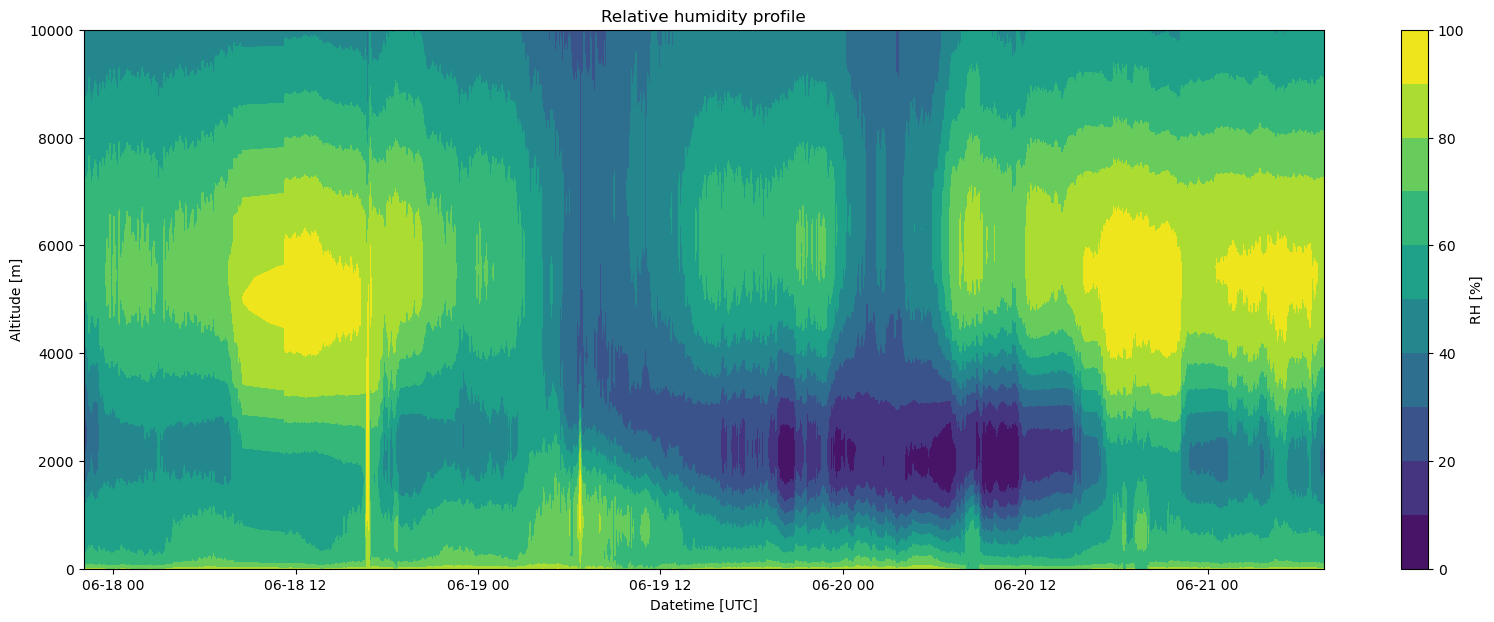

In [19]:
fig,ax = plt.subplots(1,figsize=(20,7))
contour = ax.contourf(HPC.time, HPC.altitude[0], HPC.RH_prof.T, vmin = 0, vmax = 97.4945, levels = 10)
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('RH [%]')
ax.set_title('Relative humidity profile')
ax.set_ylabel('Altitude [m]')
ax.set_xlabel('Datetime [UTC]')


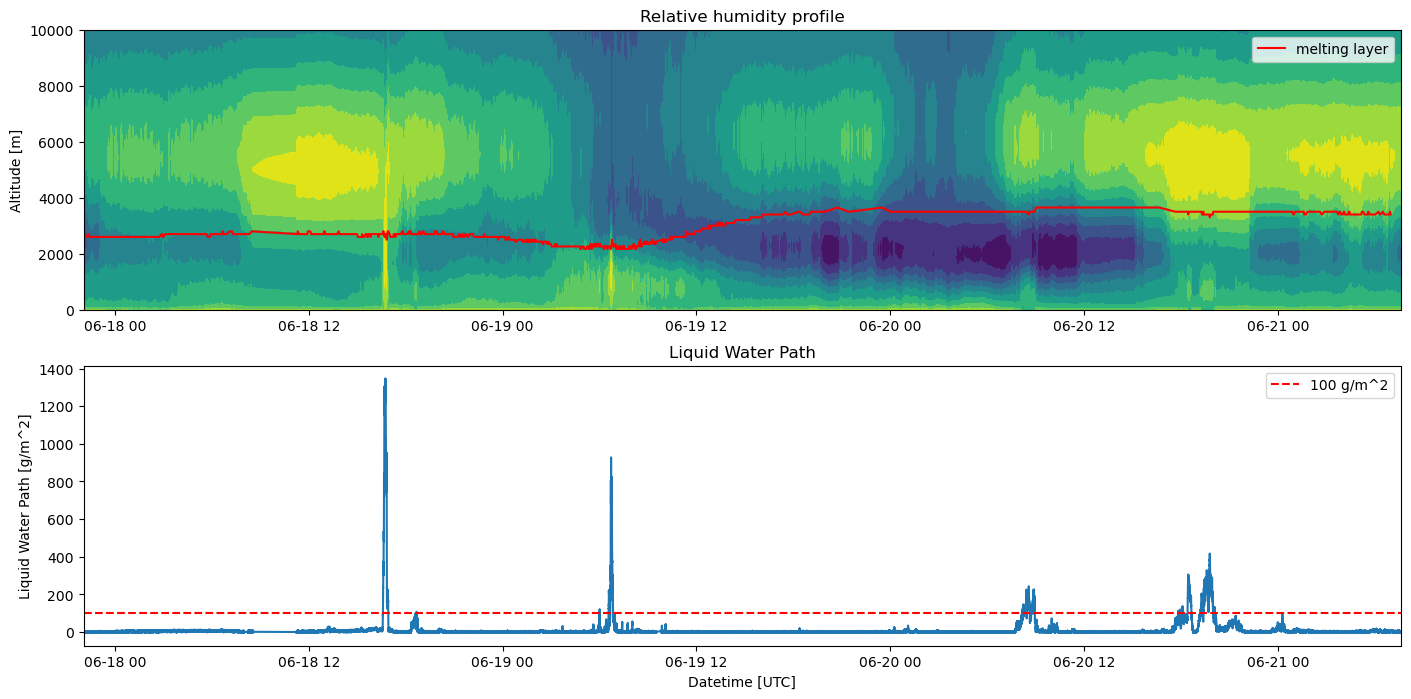

In [20]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.contourf(HPC.time, HPC.altitude[0], HPC.RH_prof.T, HPC.RH_prof.T, vmin = 0, vmax = 100, levels = 10)
ax1.set_title('Relative humidity profile')
ax1.set_ylabel('Altitude [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax1.plot(melting_altitude.time[non_nan_indices[0]],melting_heights, color = 'red', label = 'melting layer')
ax1.legend()

ax2.plot(LWP.time, LWP.LWP)
ax2.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax2.set_ylabel('Liquid Water Path [g/m^2]')
ax2.set_title('Liquid Water Path')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax2.set_xlabel('Datetime [UTC]')
ax2.legend()


Text(0.5, 0, 'Datetime [UTC]')

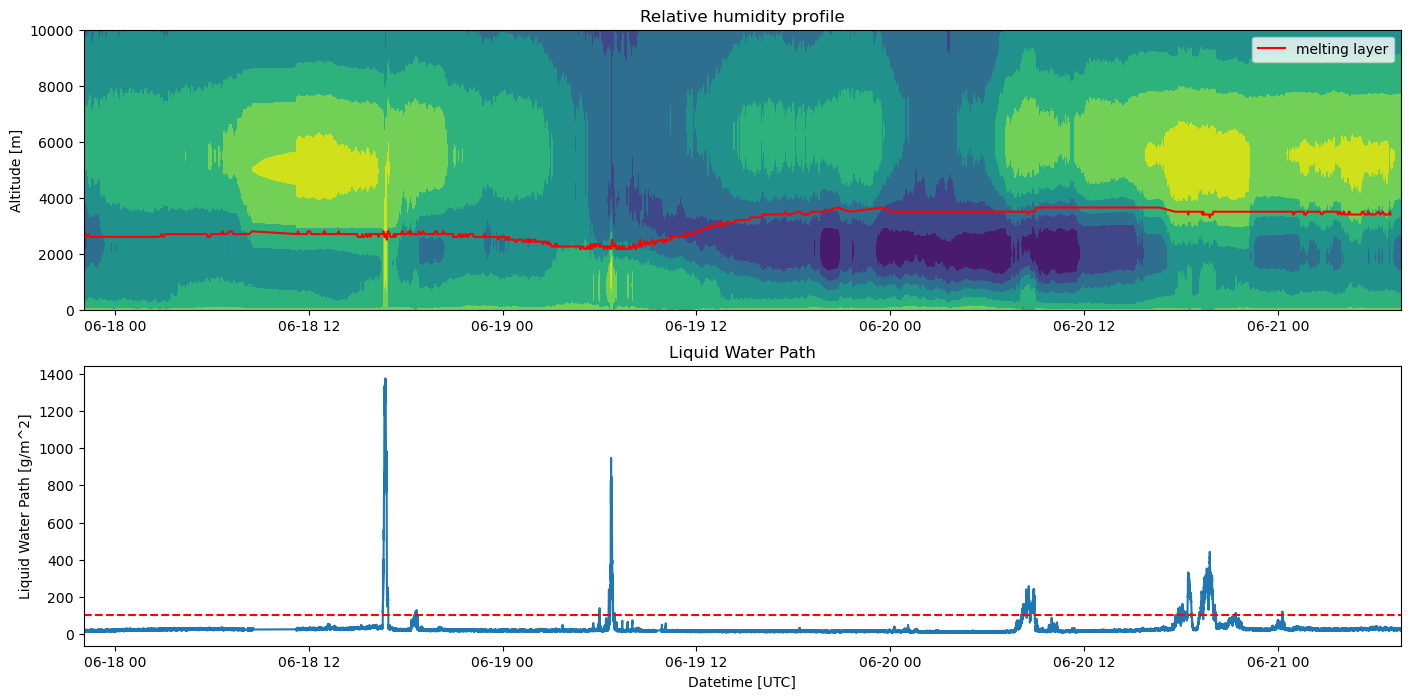

In [21]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.contourf(HPC.time, HPC.altitude[0], HPC.RH_prof.T)
ax1.set_title('Relative humidity profile')
ax1.set_ylabel('Altitude [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax1.plot(melting_altitude.time[non_nan_indices[0]],melting_heights, color = 'red', label = 'melting layer')
ax1.legend()

ax2.plot(IWV.time, IWV.IWV + LWP.LWP)
ax2.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax2.set_ylabel('Liquid Water Path [g/m^2]')
ax2.set_title('Liquid Water Path')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax2.set_xlabel('Datetime [UTC]')


In [22]:
liquid_wc = HPC.RH_prof.where(HPC.RH_prof > 80)

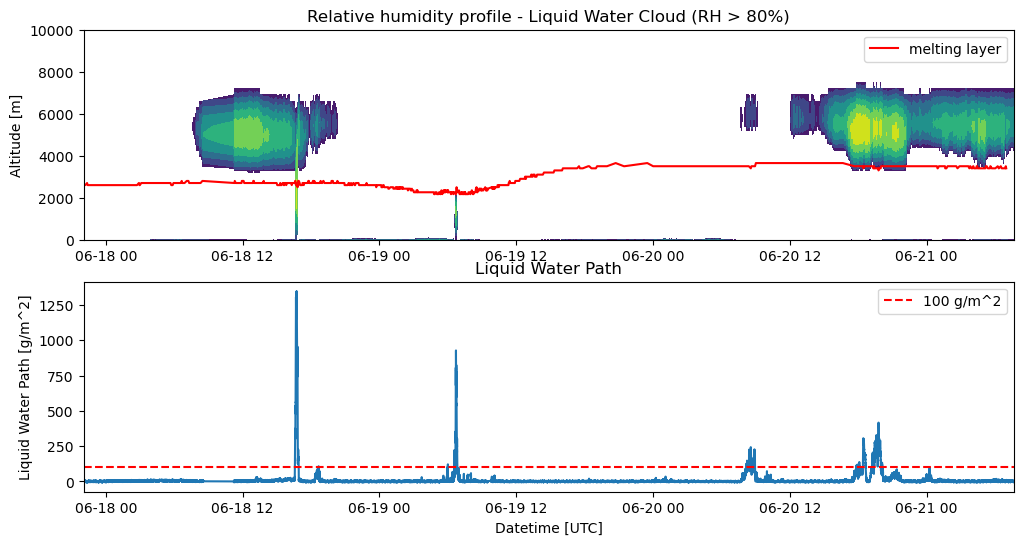

In [23]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,6))

ax1.contourf(HPC.time, HPC.altitude[1], liquid_wc.T)
ax1.set_title('Relative humidity profile - Liquid Water Cloud (RH > 80%)')
ax1.set_ylabel('Altitude [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax1.plot(melting_altitude.time[non_nan_indices[0]],melting_heights, color = 'red', label = 'melting layer')
ax1.legend()

ax2.plot(LWP.time, LWP.LWP)
ax2.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax2.set_ylabel('Liquid Water Path [g/m^2]')
ax2.set_title('Liquid Water Path')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax2.set_xlabel('Datetime [UTC]')
ax2.legend()


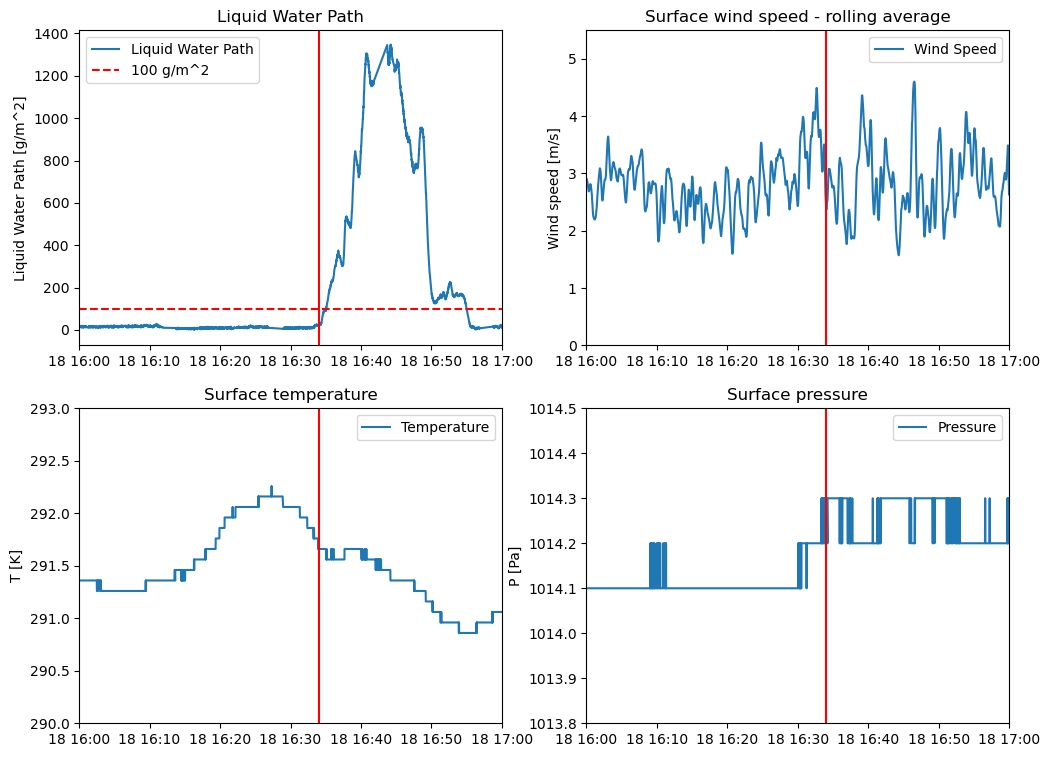

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))

ax1.plot(LWP.time, LWP.LWP, label= 'Liquid Water Path')
ax1.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax1.set_ylabel('Liquid Water Path [g/m^2]')
ax1.set_title('Liquid Water Path')
ax1.set_xlim(pd.Timestamp("2024-06-18T16"), pd.Timestamp("2024-06-18T17"))
ax1.axvline(pd.Timestamp('2024-06-18T16:34'), color='red')
ax1.legend()


ax2.plot(MET.time, MET.Surf_WS.rolling(time=20, center=True).mean()/3.6, label = 'Wind Speed')
ax2.set_title('Surface wind speed - rolling average')
ax2.set_ylabel('Wind speed [m/s]')
ax2.set_xlim(pd.Timestamp("2024-06-18T16"), pd.Timestamp("2024-06-18T17"))
ax2.set_ylim(0, 5.5)
ax2.axvline(pd.Timestamp('2024-06-18T16:34'), color='red')
ax2.legend()



ax3.plot(MET.time, MET.Surf_T, label = 'Temperature')
ax3.set_title('Surface temperature')
ax3.set_ylabel('T [K]')
ax3.set_xlim(pd.Timestamp("2024-06-18T16"), pd.Timestamp("2024-06-18T17"))
ax3.set_ylim(290, 293)
ax3.axvline(pd.Timestamp('2024-06-18T16:34'), color='red')
ax3.legend()

ax4.plot(MET.time, MET.Surf_P, label = 'Pressure')
ax4.set_title('Surface pressure')
ax4.set_ylabel('P [Pa]')
ax4.set_xlim(pd.Timestamp("2024-06-18T16"), pd.Timestamp("2024-06-18T17"))
ax4.set_ylim(1013.8, 1014.5)
ax4.axvline(pd.Timestamp('2024-06-18T16:34'), color='red')
ax4.legend()




# Surface Wind and Humidity

Text(0.5, 1.0, 'Surface wind speed and temperature scatter plot')

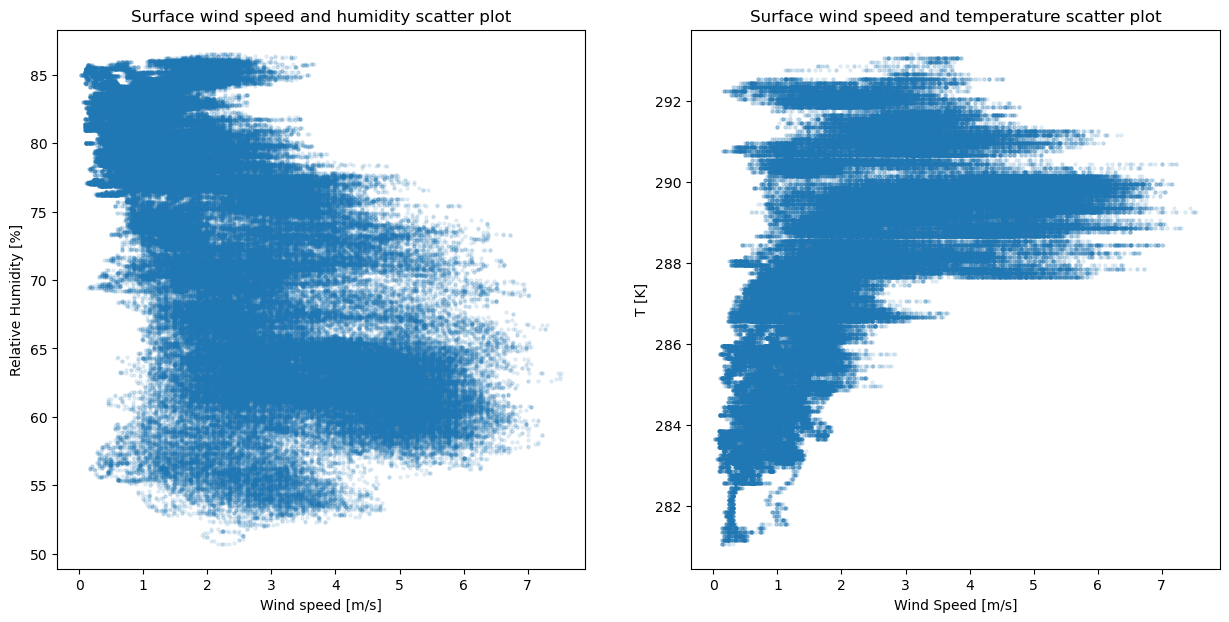

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.scatter(MET.Surf_WS/3.6, MET.Surf_RH, s=5, alpha=0.1)
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Relative Humidity [%]')
ax1.set_title('Surface wind speed and humidity scatter plot')
#ax1.grid()

ax2.scatter(MET.Surf_WS/3.6, MET.Surf_T, s=5, alpha=0.1)
ax2.set_xlabel('Wind Speed [m/s]')
ax2.set_ylabel('T [K]')
ax2.set_title('Surface wind speed and temperature scatter plot')
#ax2.grid()


Text(0.5, 1.0, 'Surface wind speed and humidity scatter plot')

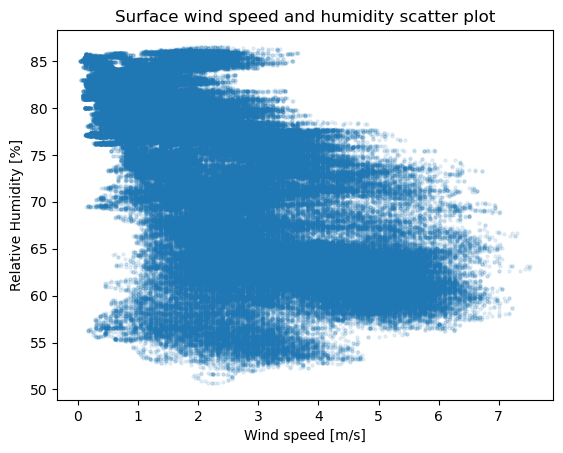

In [26]:
plt.scatter(MET.Surf_WS / 3.6, MET.Surf_RH, s=5, alpha=0.1)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Relative Humidity [%]')
plt.title('Surface wind speed and humidity scatter plot')

Text(227, 90, 'Wind coming from sea')

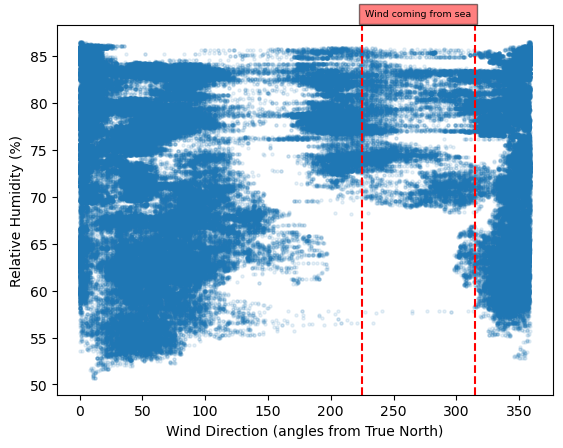

In [36]:
## wind direction and humidity

plt.scatter(MET.Surf_WD, MET.Surf_RH, s=5,alpha=0.1)
plt.xlabel('Wind Direction (angles from True North)')
plt.ylabel('Relative Humidity (%)')
plt.axvline(225,color='red',linestyle='--')
plt.axvline(315,color='red',linestyle='--')
plt.text(227, 90, 'Wind coming from sea', fontsize=6.8,
        verticalalignment='top',bbox = dict(facecolor = 'red', alpha = 0.5))

# DAVIS and Radiometer comparison

In [27]:
## choosing the same time as the one available from the DAVIS
indexer = (MET['time'] > np.datetime64('2024-06-18T16:00:00.000000000')) & (MET['time'] < np.datetime64('2024-06-20T16:30:00.000000000'))
indexer = indexer.compute()
wstn_speeds = MET.where(indexer, drop=True)
wstn_speeds

<xarray.Dataset>
Dimensions:            (time: 162339)
Coordinates:
  * time               (time) datetime64[ns] 2024-06-18T16:00:01 ... 2024-06-...
Data variables: (12/23)
    file_code          (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    Rad_ID             (time) float64 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    RSFactor           (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    IntSampCnt         (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    Min_P              (time) float32 1.014e+03 1.014e+03 ... 1.017e+03
    Max_P              (time) float32 1.016e+03 1.016e+03 ... 1.024e+03
    ...                 ...
    Min_WD             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Max_WD             (time) float32 359.0 359.0 359.0 ... 358.0 358.0 358.0
    Surf_WD            (time) float32 dask.array<chunksize=(24433,), meta=np.ndarray>
    Min_RR             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maximum_Rain_Rate  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Surf_RR            (time) float32 dask.array<chunksize=(24433,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [28]:
DAVIS

<xarray.Dataset>
Dimensions:      (time: 2840)
Coordinates:
  * time         (time) datetime64[ns] 2024-06-18T16:02:00 ... 2024-06-20T15:...
Data variables: (12/16)
    latitude     (time) float32 52.0 52.0 52.0 52.0 52.0 ... 52.0 52.0 52.0 52.0
    longitude    (time) float32 4.379 4.379 4.379 4.379 ... 4.379 4.379 4.379
    altitude     (time) float32 3.0 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0
    barometer    (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    inHumidity   (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    inTemp       (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    ...           ...
    rainRate     (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    UV           (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    windDir      (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    windGust     (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    windGustDir  (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
    windSpeed    (time) float32 dask.array<chunksize=(478,), meta=np.ndarray>
Attributes: (12/13)
    title:                 Davis weather station data
    institution:           Delft University of Technology
    source:                surface observation
    history:               -
    Conventions:           CF-1.7
    site_name:             Schiedam_DCMR
    ...                    ...
    project_name:          Rotterdam Atmospheric Measurement Network (RAMN), ...
    website:               https://ruisdael-observatory.nl/
    contributors:          Marc Schleiss, Marjolein van Esch, Rob Mackenzie, ...
    sensor_type:           Davis weather station - Vantage Pro2
    sensor_serial_number:  BF230104025
    license:               https://creativecommons.org/licenses/by-sa/4.0/

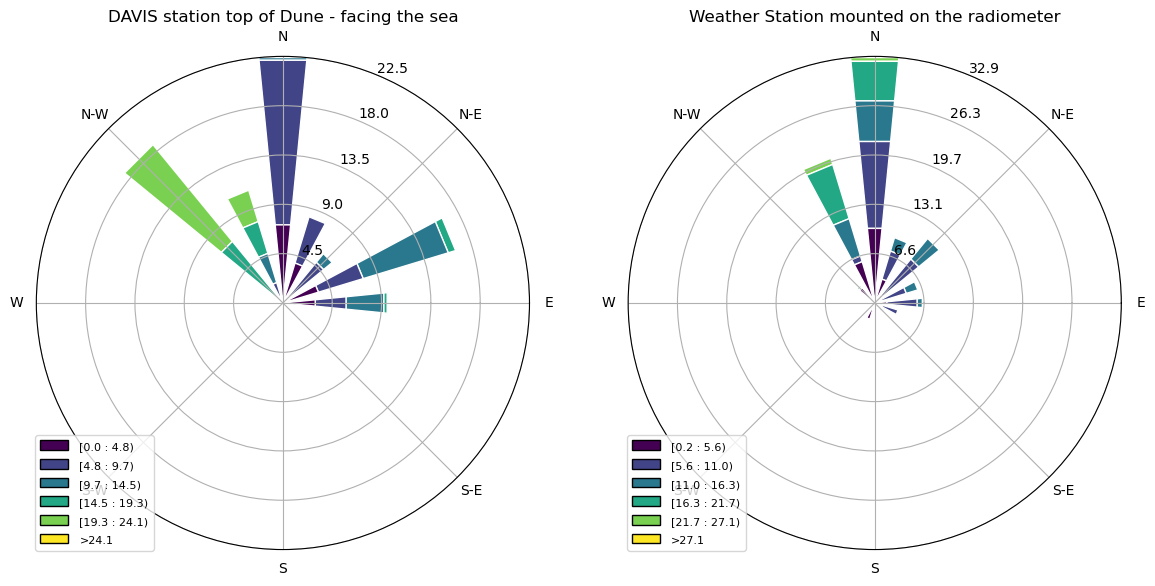

In [29]:
##windroses by DAVIS and radiometer WS

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection='windrose'), figsize=(14, 7))

## WS weather station wind rose
ax2.bar(wstn_speeds.Surf_WD,wstn_speeds.Surf_WS, normed=True, opening=0.5, edgecolor='white')
ax2.set_legend()
ax2.set_title('Weather Station mounted on the radiometer')

## DAVIS wind rose
ax1.bar(DAVIS.windDir,(DAVIS.windSpeed)*3.6, normed=True, opening=0.5, edgecolor='white')
ax1.set_legend()
ax1.set_title('DAVIS station top of Dune - facing the sea')
plt.show()

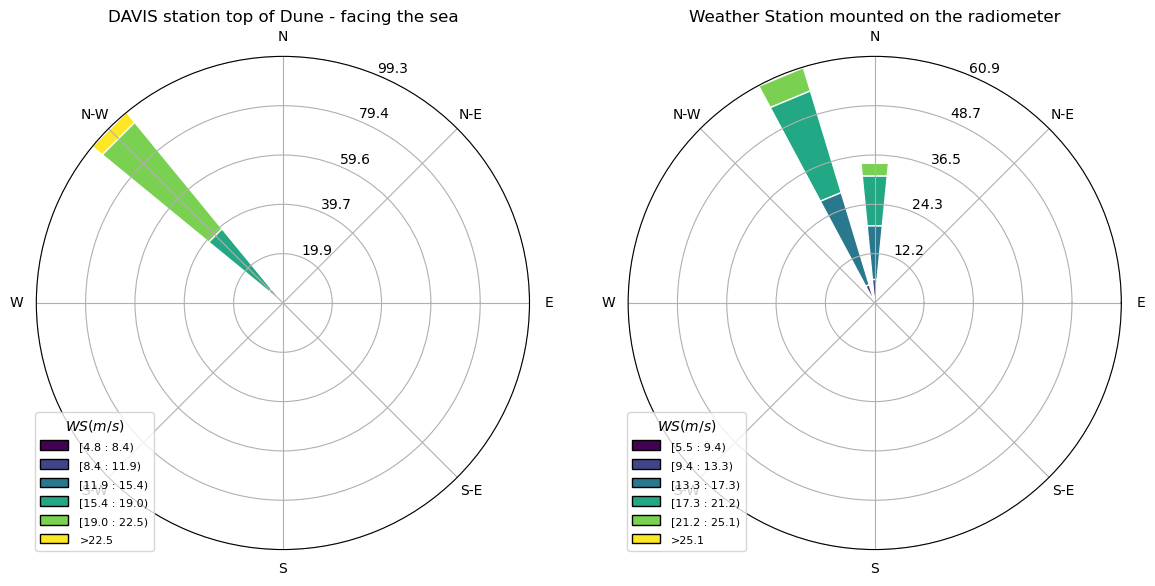

In [30]:
##singling out the western sea winds

indexer_3 = ((DAVIS.windDir > 225) & (DAVIS.windDir < 325))   ## western wind direction
indexer_3 = indexer_3.compute()
humid = DAVIS.where(indexer_3, drop=True)
time_check = humid.time.values

MET_from_sea = MET.sel(time=(time_check), method='nearest')  ## choosing the simultaneus measurements at the radiometer WS

## plots

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection='windrose'), figsize=(14, 7))

ax1.bar(humid.windDir,humid.windSpeed*3.6, normed=True, opening=0.5, edgecolor='white')
ax1.set_legend(title=r"$WS (m/s)$")
ax1.set_title('DAVIS station top of Dune - facing the sea')

ax2.bar(MET_from_sea.Surf_WD,MET_from_sea.Surf_WS, normed=True, opening=0.5, edgecolor='white')
ax2.set_legend(title=r"$WS (m/s)$")
ax2.set_title('Weather Station mounted on the radiometer')
plt.show()


Text(0.5, 0, 'Datetime [UTC]')

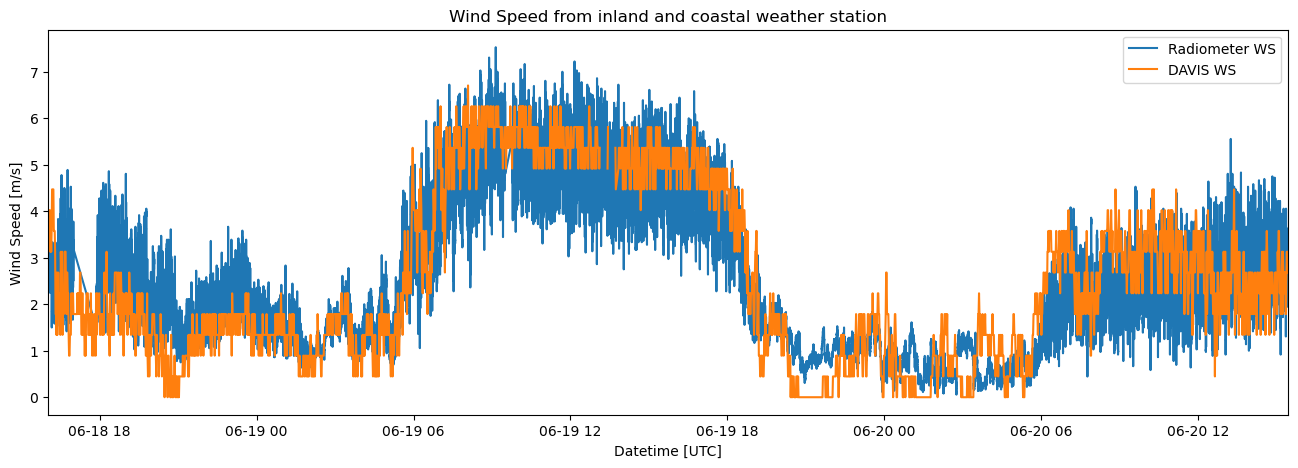

In [31]:
##wind speed time series comparison

plt.figure(figsize=(16,5))
plt.plot(wstn_speeds.time, wstn_speeds.Surf_WS/3.6, label='Radiometer WS')
plt.plot(DAVIS.time, DAVIS.windSpeed, label = 'DAVIS WS')
plt.legend()
plt.title('Wind Speed from inland and coastal weather station')
plt.xlim(pd.Timestamp("2024-06-18T16:02:00.000000000"), pd.Timestamp("2024-06-20T15:26:00.000228881"))
plt.ylabel('Wind Speed [m/s]')
plt.xlabel('Datetime [UTC]')


In [32]:
def qsat (P, T): #function to calculate saturation specific humidity
    #epsilon = Rd/Rv
    epsilon = 0.622
    p0 = 6.1078 #hPa
    T0 = 273.15 # K
    Lv= 2.5e6       # J/kg
    Rv = 461.5      # J/kgK


    #e_sat = p0*np.exp( 17.2694*(T-273.16) / (T-35.86) )

    qs = epsilon*p0/P*np.exp(-Lv/Rv*(1/T-1/T0))*1e3 #in g/kg
    
    return qs

Text(0.5, 0, 'Datetime [UTC]')

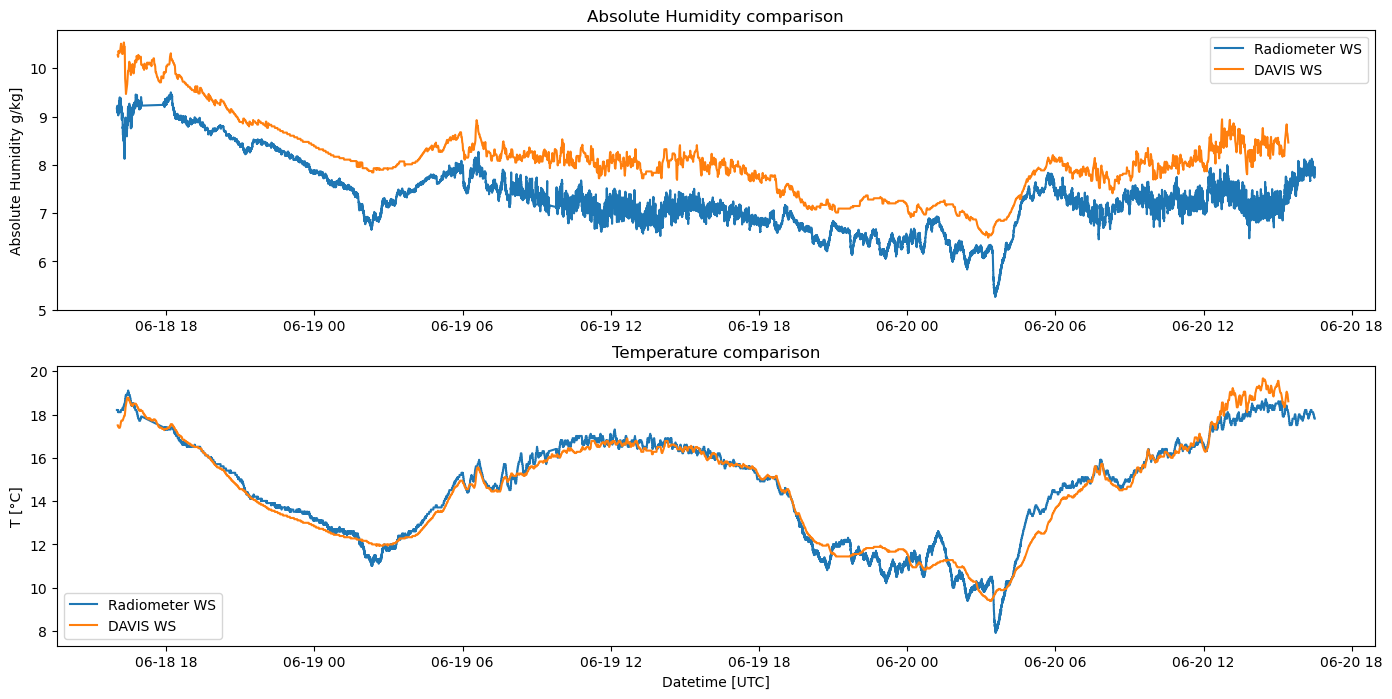

In [33]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.plot(wstn_speeds.time, wstn_speeds.Surf_RH*qsat(wstn_speeds.Surf_P, wstn_speeds.Surf_T)/100, label ='Radiometer WS')
ax1.plot(DAVIS.time, DAVIS.outHumidity*qsat(DAVIS.barometer, DAVIS.outTemp+273.15)/100, label='DAVIS WS')
ax1.set_ylabel('Absolute Humidity g/kg]')
ax1.legend()
ax1.set_title('Absolute Humidity comparison')

ax2.plot(wstn_speeds.time, wstn_speeds.Surf_T-273.15, label ='Radiometer WS')
ax2.plot(DAVIS.time, DAVIS.outTemp, label='DAVIS WS')
ax2.set_ylabel('T [°C]')
ax2.legend()
ax2.set_title('Temperature comparison')
ax2.set_xlabel('Datetime [UTC]')



Text(0.5, 0, 'Datetime [UTC]')

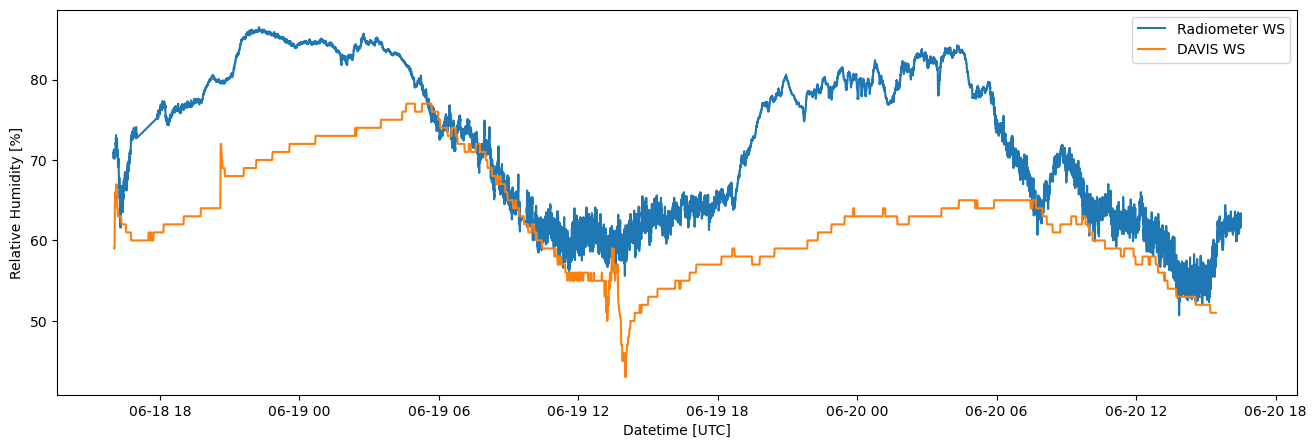

In [34]:
plt.figure(figsize=(16,5))
plt.plot(wstn_speeds.time, wstn_speeds.Surf_RH, label ='Radiometer WS')
plt.plot(DAVIS.time, DAVIS.inHumidity, label='DAVIS WS')
plt.ylabel('Relative Humidity [%]')
plt.legend()
plt.xlabel('Datetime [UTC]')

Text(0.5, 1.0, 'Absolute Humidity in the field depending on different wind directions')

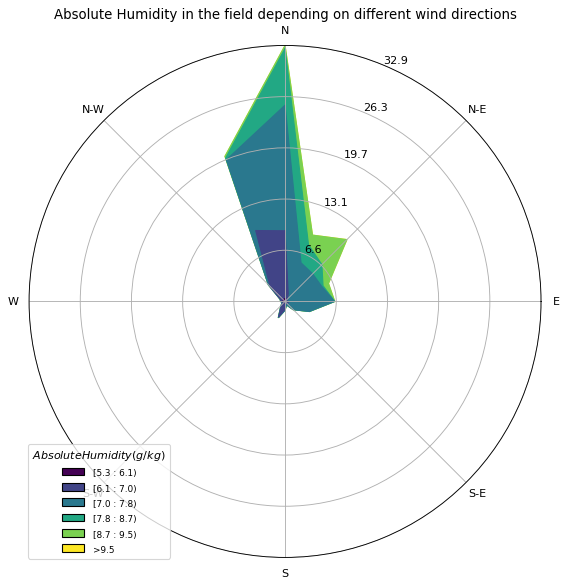

In [35]:
## absolute humidity and wind direction rose

ax = WindroseAxes.from_ax()
ax.contourf(
       wstn_speeds.Surf_WD, wstn_speeds.Surf_RH*qsat(wstn_speeds.Surf_P, wstn_speeds.Surf_T)/100, normed=True )
ax.set_legend(title=r"$Absolute Humidity (g/kg)$")
ax.set_title('Absolute Humidity in the field depending on different wind directions')